# Linear Least Squares

**Linear Least Squares** is a method used to find the best-fitting line by minimizing the sum of squared differences (residuals) between observed and predicted values. This approach is widely applied in regression analysis to model the relationship between variables. The goal is to minimize the error between the data points and the linear model, which helps in making accurate predictions or understanding underlying trends. The method is foundational in fields like machine learning, economics, and engineering.

## Matrix Formulation of Ordinary Least Squares

The solution to the linear least squares problem can be expressed as a **minimization problem**, where we seek to minimize the sum of squared residuals:

$$
\min_{\textbf{x}} \| \textbf{A} \textbf{x} - \textbf{b} \|^2
$$

Where:
- $\textbf{x}$ is the vector of parameters (e.g., slope \(m\) and intercept \(b\) in the case of simple linear regression),
- $A$ is the matrix of input features (with each row representing a data point),
- $\textbf{b}$ is the vector of observed outputs (target values),
- The expression $\| \textbf{A} \textbf{x} - \textbf{b} \|^2$ represents the sum of squared residuals (or errors) between the predicted and observed values.

The optimal solution to this minimization problem is given by the matrix formulation:

$$
\textbf{x} = (A^T A)^{-1} A^T \textbf{b}
$$

This formulation provides the optimal parameters that minimize the sum of squared residuals, which is the objective of linear least squares. It is widely used in both simple and multivariable linear regression.


First, choosing the number of points we would like to have. 

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import random

n = random.randint(1,400)
print("Number of points: " + str(n))


Number of points: 97


## Generating Random Points for Linear Least Squares

To generate random points, we first define \( n \), the number of data points, which will be randomly chosen. For each point \( (x_i, y_i) \), we store the \( x \)-coordinates and \( y \)-coordinates in separate arrays:

$$
[x_1, x_2, \dots, x_n] \quad [y_1, y_2, \dots, y_n]
$$

Each point is indexed using $x[i]$ and $ y[i] $, where $ i $ ranges from 1 to $ n $. We then plot these points to visualize the data distribution.

The following code generates and plots these random points:

In [250]:
x_coord = np.zeros(n)
y_coord = np.zeros(n)

for i in range(n):
    x_coord[i] = random.randint(10, 200)
    y_coord[i] = random.randint(10, 200)



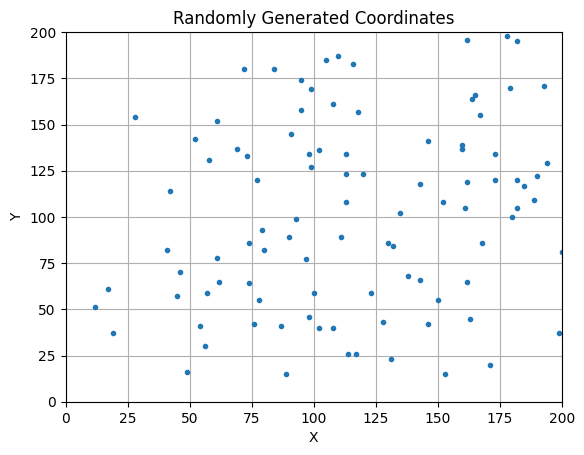

In [251]:
plt.plot(x_coord, y_coord, '.')
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Randomly Generated Coordinates')
plt.show()

### 1. What is the Matrix $ A $ in Linear Least Squares?

In the context of **Linear Least Squares (LLS)**, the matrix $ A $ is the **design matrix** (also called the **feature matrix**). It represents the input data in a structured form that can be used to compute the optimal parameters (e.g., slope $ m $ and intercept $ b $) of the linear model.

#### Structure of Matrix $ A $

For **simple linear regression** (where the model is of the form $ y = mx + b $), the design matrix $ A $ is constructed as follows:

$$
A = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$

Where:
- Each row of $ A $ corresponds to a single data point.
- The first column contains all ones (representing the constant term $ b $, the intercept), and the second column contains the corresponding $ x $-values of the data points (the input features).

This matrix $ A $ plays a crucial role in expressing the input data in a way that is usable for the **Normal Equation** of Linear Least Squares, which is used to find the optimal values for the model parameters.


In [252]:
A = np.zeros((n,2))

for i in range(n):
    A[i] = [1,x_coord[i]]

### Computing $ (A^T A)^{-1} $ in the Context of Linear Least Squares

In the context of **Linear Least Squares (LLS)**, one of the key steps in solving for the optimal parameters of the linear model is to compute $$ (A^T A)^{-1} $$ This is part of the **Normal Equation**, which is used to find the best-fitting line that minimizes the sum of squared residuals.

The **Normal Equation** for linear regression is given by:

$$
\mathbf{x} = (A^T A)^{-1} A^T \mathbf{b}
$$

Where:
- $ A $ is the **design matrix** containing the input data (with each row representing a data point),
- $ \textbf{x} $ is the vector of parameters (e.g., slope $ m $ and intercept $ b $),
- $ \textbf{b} $ is the vector of observed outputs (the $ y $-values).

In [253]:
ATAI = np.linalg.inv((np.matmul(A.T,A)))
print(ATAI)



[[ 6.95854337e-02 -5.13786710e-04]
 [-5.13786710e-04  4.45333847e-06]]


$A^T\vec{b}$

In [254]:
AB = np.matmul(A.T, y_coord.T)
# AB = numpy.round(AB, 4)
print(AB)

[   9878. 1189379.]


Giving us the final result of $\vec{x} = \begin{bmatrix}b \\ m\end{bmatrix}=(A^TA)^{-1}A^T\vec{b}$

In [255]:
result  = np.matmul(ATAI, AB)
result = np.round(result, 4)
b = result[0]
m = result[1]
print(f"The equation of the best-fitting line is approximately: y = {m}x + {b}")
#print(result)

The equation of the best-fitting line is approximately: y = 0.2215x + 76.2778


In [256]:
b = result[0]
m = result[1]
x = np.linspace(0, 200, 100)

y = m * x + b 

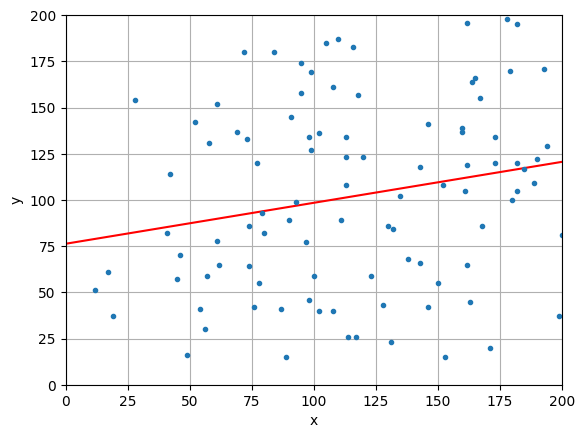

In [257]:
plt.plot(x, y, label=f'y = {m}x + {b}', color='red')
plt.plot(x_coord, y_coord,'.')
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()